In [21]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import seaborn as sns

In [22]:
os.chdir("../")
from fastqaoa.ctypes import qaoa, optimize
from problems.integer_knapsack import IntegerKnapsack
from fastqaoa.optimize import grid_search

In [34]:
def get_ks(N):
    costs = 1 + np.arange(N)
    weights = N + 1 - costs
    max_capacity = N
    return IntegerKnapsack(weights=weights, costs=costs, max_capacity=max_capacity, id=-1, n_qubits=N)

def get_opt(ks):
    masked_cost = ks.masked_cost()
    masked_cost = ks.n_qubits * masked_cost / (-1 * masked_cost.min_val)
    res = grid_search(masked_cost, masked_cost, dim_num=20)
    res = optimize.optimize_qaoa_lbfgs(masked_cost, masked_cost, [res[0]], [res[1]])
    return res.betas[0], res.gammas[0], res.it

In [35]:
res = []
for i in range(6, 14, 2):
    instances = IntegerKnapsack.get_instances()[i]
    for j in range(64):
        a, b, it = get_opt(instances[j])
        res.append([i, j, a, b, it])

df = pd.DataFrame(res, columns=["size", "id", "beta", "gamma", "it"])

In [36]:
df.it.describe()

count    256.000000
mean       7.777344
std        1.240349
min        6.000000
25%        7.000000
50%        8.000000
75%        8.000000
max       19.000000
Name: it, dtype: float64

<Axes: xlabel='beta', ylabel='gamma'>

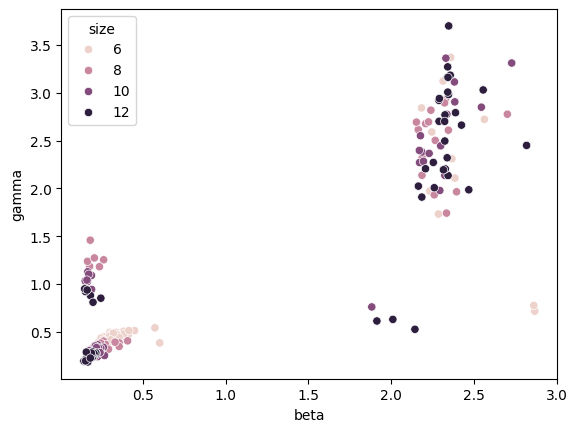

In [37]:
sns.scatterplot(df, x="beta", y="gamma", hue="size")

In [15]:
n, id = 12, 56
ks = IntegerKnapsack.get_instances()[n][id]

In [16]:
masked_cost = ks.masked_cost()
masked_cost = ks.n_qubits * masked_cost / (-1 * masked_cost.min_val)

In [18]:
ba, bb = 0, np.pi
ga, gb = 0, np.pi

x = np.linspace(ba, bb, 200)
y = np.linspace(ga, gb, 200)

X, Y = np.meshgrid(x, y)

Xr = np.expand_dims(X.ravel(), -1)
Yr = np.expand_dims(Y.ravel(), -1)

res = qaoa.multi_energy(masked_cost, masked_cost, Xr, Yr)

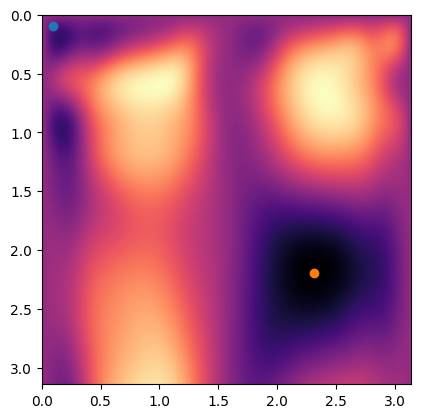

In [19]:
plt.imshow(res.reshape(X.shape), cmap="magma", extent=[ba, bb, gb, ga])
plt.scatter(0.1, 0.1)
r = df.query("size == @n and id == @id").iloc[0]
plt.scatter(r.beta, r.gamma)

In [13]:
print(masked_cost.to_numpy())

[ 0.         -0.82051282 -1.64102564 -2.46153846 -1.70940171 -2.52991453
 -3.35042735 -4.17094017 -0.95726496 -1.77777778 -2.5982906  -3.41880342
 -2.66666667 -3.48717949 -4.30769231 -5.12820513 -1.64102564 -2.46153846
 -3.28205128 -4.1025641  -3.35042735 -4.17094017 -4.99145299 -5.81196581
 -2.5982906  -3.41880342 -4.23931624 -5.05982906 -4.30769231  0.
 -5.94871795  0.         -0.13675214 -0.95726496 -1.77777778 -2.5982906
 -1.84615385 -2.66666667 -3.48717949 -4.30769231 -1.09401709 -1.91452991
 -2.73504274 -3.55555556 -2.8034188   0.         -4.44444444  0.
 -1.77777778 -2.5982906  -3.41880342 -4.23931624 -3.48717949  0.
 -5.12820513  0.         -2.73504274  0.         -4.37606838  0.
 -4.44444444  0.          0.          0.         -1.5042735  -2.32478632
 -3.14529915 -3.96581197 -3.21367521 -4.03418803 -4.85470085 -5.67521368
 -2.46153846 -3.28205128 -4.1025641  -4.92307692 -4.17094017  0.
 -5.81196581  0.         -3.14529915 -3.96581197 -4.78632479 -5.60683761
 -4.85470085 -5.675